### EDA-特征工程

In [61]:
import xgboost as xgb

In [74]:
def TestDataSet(train):
    y=train['SalePrice']
    train2=train.drop(['SalePrice'],axis=1)
    X=pd.get_dummies(train2)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
    xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.7,learning_rate=0.01,max_depth=3,n_estimators=3000,subsample=0.7,reg_alpha=0.0006,nthread=6)
    xg_reg.fit(X_train,y_train)
    benchmark1(xg_reg,X_test,y_test)

In [67]:
TestDataSet(train)

RMSE: 22747.937607375123
LRMSE: 0.10267940739078917


In [70]:
x=train.corr()['SalePrice']

#### 去掉极弱相关(|corr|<0.3)

In [73]:
TestDataSet(train.drop(x[abs(x)<0.3].index.tolist(),axis=1))

RMSE: 24493.170974380915
LRMSE: 0.1092756690472248


实验结果标注名，草率去掉低于0.3的极弱相关属性就目前的数据集不会改进算法的结果

#### 去掉绝对值小于0.1的列

In [75]:
TestDataSet(train.drop(x[abs(x)<0.1].index.tolist(),axis=1))

RMSE: 23953.771426822474
LRMSE: 0.10829674662542016


#### 去掉相关性小于0.1的列

In [76]:
TestDataSet(train.drop(x[x<0.1].index.tolist(),axis=1))

RMSE: 23408.818211833623
LRMSE: 0.10631323797733613


#### 去掉正相关但是小于0.1的列

In [79]:
TestDataSet(train.drop(x[(x<0.1) & (x>0)].index.tolist(),axis=1))

RMSE: 22897.938327661526
LRMSE: 0.10212401106719694


### Target的偏度分析

In [81]:
import seaborn as sns

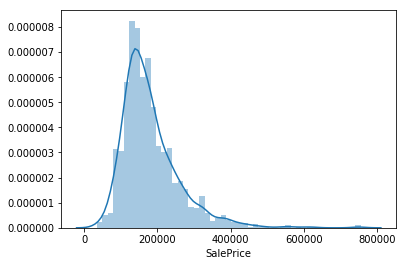

In [82]:
sns.distplot(train['SalePrice'])

#### 使用降次函数调整数据的偏度

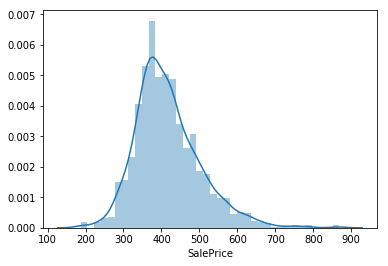

In [84]:
sns.distplot(np.sqrt(train['SalePrice']))

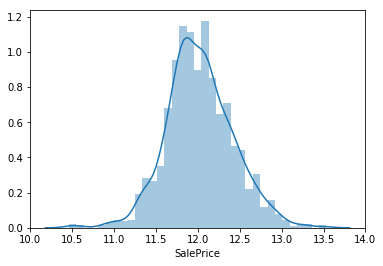

In [86]:
sns.distplot(np.log(train['SalePrice']))

In [89]:
def TestDataSet2(train):
    y=np.log(train['SalePrice'])
    train2=train.drop(['Id','SalePrice'],axis=1)
    X=pd.get_dummies(train2)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
    xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.7,learning_rate=0.01,max_depth=3,n_estimators=3000,subsample=0.7,reg_alpha=0.0006,nthread=6)
    xg_reg.fit(X_train,y_train)
    benchmark1(xg_reg,X_test,y_test)

In [90]:
TestDataSet2(train)

RMSE: 0.10575709981973441
LRMSE: 0.008893218608158249


In [93]:
def TestDataSet3(train):
    y=np.sqrt(train['SalePrice'])
    if 'Id' in train.columns:
        train2=train.drop(['Id','SalePrice'],axis=1)
    else:
        train2=train.drop(['SalePrice'],axis=1)
    X=pd.get_dummies(train2)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
    xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.7,learning_rate=0.01,max_depth=3,n_estimators=3000,subsample=0.7,reg_alpha=0.0006,nthread=6)
    xg_reg.fit(X_train,y_train)
    #benchmark1(xg_reg,X_test,y_test)
    pred=xg_reg.predict(X_test)
    pred=pred**2
    y_test=y_test**2
    print(np.sqrt(mean_squared_error(np.log(pred),np.log(y_test))))

In [92]:
TestDataSet3(train)

0.10459702326285117


In [94]:
TestDataSet3(train.drop(x[(x<0.1) & (x>0)].index.tolist(),axis=1))

0.10193706843462444


### 小结

1.适当去掉低相关性的列，可能会提升预测的分数--因为去掉噪声；然而也可能去掉更多的信息量

2.适当变换最终目标的偏态形式，可能会提升预测的分数；然而如果调整的幅度过大，过滤掉更多的信息量

3.合理的填充非常重要

最终对于特征工程来讲其实是 噪声 vs 信息量的一个平衡型